# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Load the dataset**

In [5]:
house = pd.read_csv("C:/Users/HP/Downloads/archive (1)/Housing.csv")

In [7]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# **Preprocess the data**

In [17]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

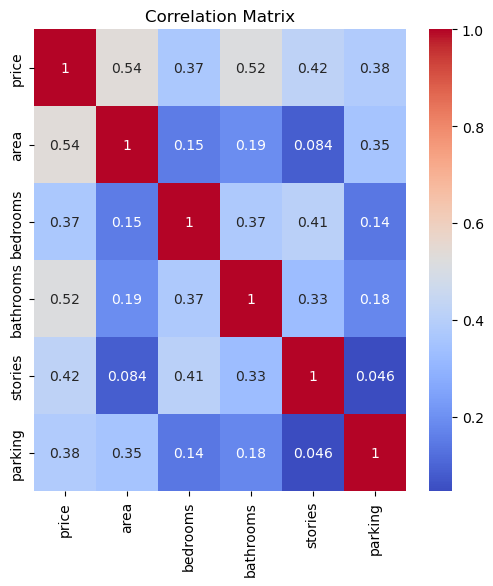

In [27]:
numeric_house = house.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 6))
sns.heatmap(numeric_house.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# **select feature and target variable**

In [50]:
X = house[['bedrooms']]  # Feature
y = house['price']       # Target

# **Split Data into Train/Test Sets**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train the Linear Regression Model**

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Evaluate the Model**

In [58]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1601134.6357488493
Mean Squared Error: 4506505949062.205
R² Score: 0.10842945504461843


# **Visualize the Regression Line**

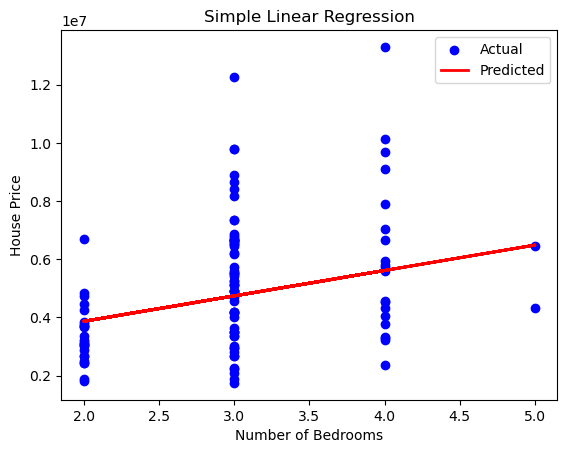

In [61]:
plt.scatter(X_test['bedrooms'], y_test, color='blue', label='Actual')
plt.plot(X_test['bedrooms'], y_pred, color='red', linewidth=2, label='Predicted')

plt.xlabel("Number of Bedrooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# **Interpret Model Coefficients**

In [64]:
print("Intercept:", model.intercept_)
print("Coefficient for bedrooms:", model.coef_[0])

Intercept: 2123152.259098624
Coefficient for bedrooms: 873140.740335659


# **Residual plot**

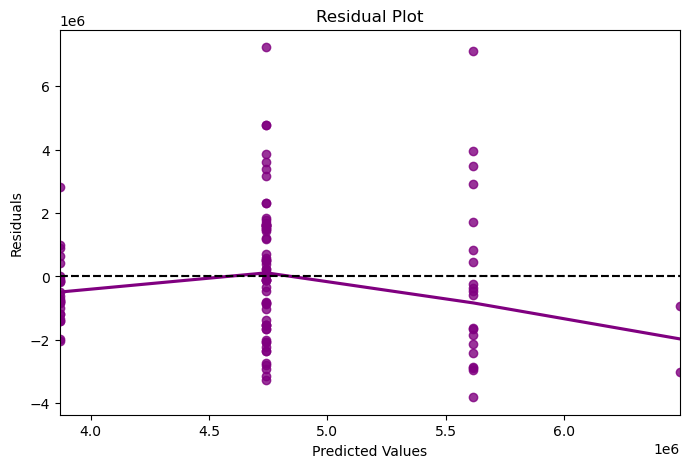

In [67]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# **Histogram of residuals**

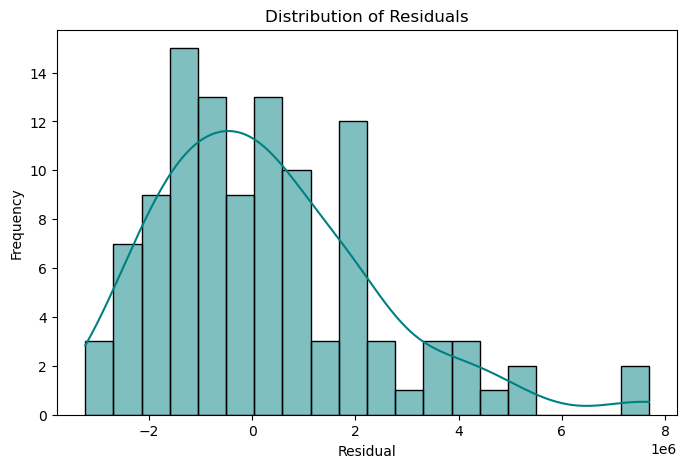

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, color="teal")
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# **Actual vs predicted scattter plot**

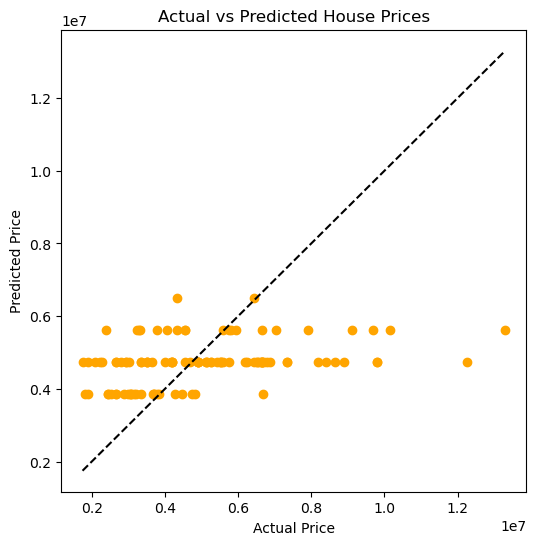

In [73]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# **Root mean square error**

In [76]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2122853.256601173


# **Adjust R2 score**

In [79]:
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors

r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.10009702004503551
